# Neural Networks: From Fundamentals to MNIST Classification

**Course:** Machine Learning 
**Topic:** Understanding Neural Networks and Deep Learning

---

## 📚 Learning Objectives

By the end of this notebook, you will:
1. Understand the basic building blocks of neural networks
2. Learn how neurons compute outputs using weights and biases
3. Grasp the concept of activation functions and their importance
4. Understand forward propagation
5. Learn how neural networks learn through gradient descent and backpropagation
6. Build a fully connected neural network from scratch
7. Train a network to recognize handwritten digits (MNIST dataset)

---


## 1. Introduction: What is a Neural Network?

### 🧠 Biological Inspiration

Neural networks are inspired by how the human brain works:
- **Neurons** are the basic units that process information
- **Synapses** connect neurons and transmit signals
- Learning happens by strengthening or weakening these connections

### 🤖 Artificial Neural Networks

In artificial neural networks:
- **Artificial neurons** process numerical inputs
- **Weights** represent connection strengths
- **Learning** happens by adjusting these weights

A typical neural network consists of:
1. **Input Layer**: Receives the raw data
2. **Hidden Layers**: Process the information
3. **Output Layer**: Produces the final prediction


In [1]:
# Let's start by importing the libraries we'll need
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import warnings
from IPython.display import Image, display
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Configure matplotlib for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

## 2. The Building Block: A Single Neuron

### 🔢 How Does a Neuron Work?

A single artificial neuron performs these steps:

1. **Receives inputs**: $x_1, x_2, ..., x_n$
2. **Multiplies each input by a weight**: $w_1, w_2, ..., w_n$
3. **Adds a bias term**: $b$
4. **Computes weighted sum**: $z = w_1x_1 + w_2x_2 + ... + w_nx_n + b$
5. **Applies activation function**: $a = f(z)$

### Mathematical Notation:

$$z = \mathbf{w}^T \mathbf{x} + b$$
$$a = f(z)$$

Where:
- $\mathbf{x}$ is the input vector
- $\mathbf{w}$ is the weight vector
- $b$ is the bias (scalar)
- $f$ is the activation function




<!-- ![Single Neuron](../assets/single_neuron.png) -->

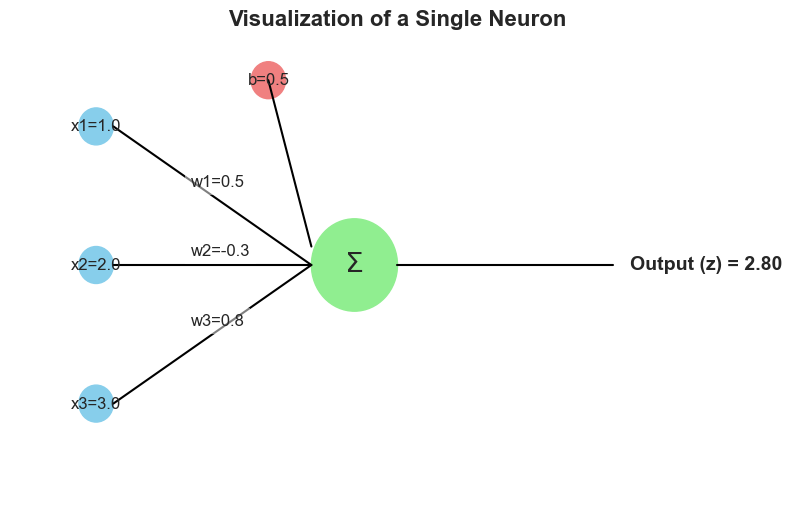




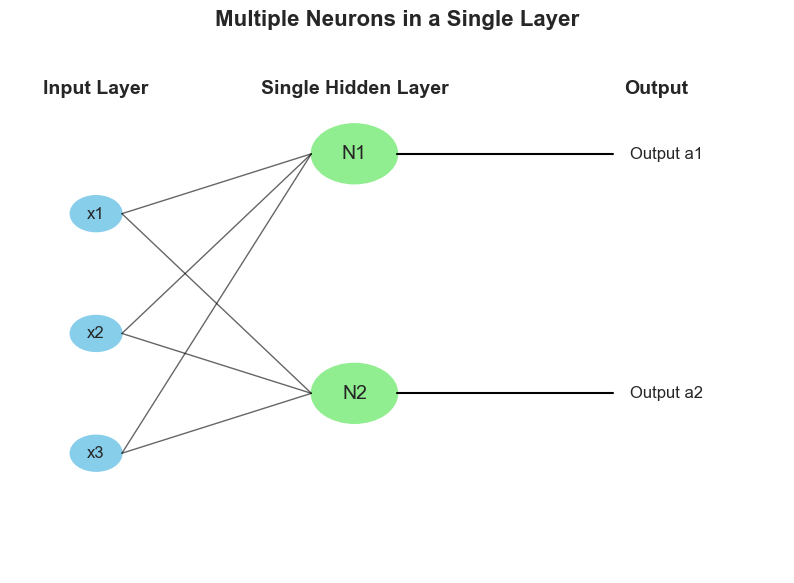






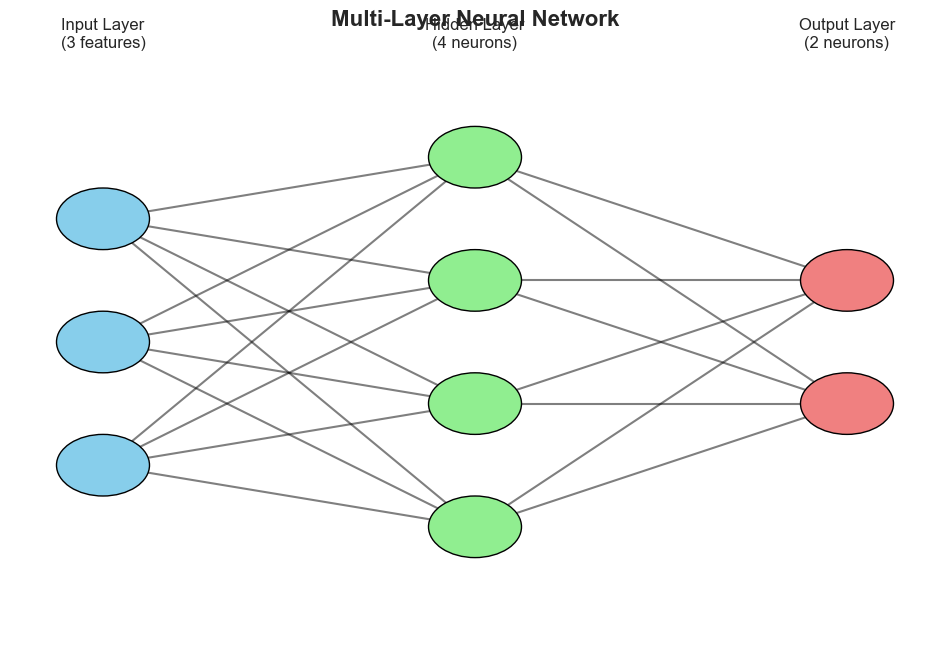


In [2]:
def single_neuron(inputs, weights, bias):
    """
    Compute the output of a single neuron (without activation function)
    
    Parameters:
    -----------
    inputs : array-like
        Input values [x1, x2, ..., xn]
    weights : array-like
        Weight values [w1, w2, ..., wn]
    bias : float
        Bias term
    
    Returns:
    --------
    float : weighted sum + bias
    """
    return np.dot(weights, inputs) + bias

# Example: A simple neuron
inputs = np.array([1.0, 2.0, 3.0])
weights = np.array([0.5, -0.3, 0.8])
bias = 0.5

output = single_neuron(inputs, weights, bias)

print("🔹 Single Neuron Example")
print(f"Inputs: {inputs}")
print(f"Weights: {weights}")
print(f"Bias: {bias}")
print(f"\nComputation: ({weights[0]} × {inputs[0]}) + ({weights[1]} × {inputs[1]}) + ({weights[2]} × {inputs[2]}) + {bias}")
print(f"Output (z): {output:.4f}")




🔹 Single Neuron Example
Inputs: [1. 2. 3.]
Weights: [ 0.5 -0.3  0.8]
Bias: 0.5

Computation: (0.5 × 1.0) + (-0.3 × 2.0) + (0.8 × 3.0) + 0.5
Output (z): 2.8000


### 🧠 Multiple Neurons in a Single Layer

A single layer in a neural network consists of multiple neurons. Each neuron in the layer receives the **same set of inputs**, but each has its own unique set of weights and its own bias. This allows each neuron to learn a different feature from the input data.

- All neurons in a layer are connected to all inputs from the previous layer (or the raw data). This is called a **fully connected** or **dense** layer.
- The output of the layer is a vector of values, with one value from each neuron.


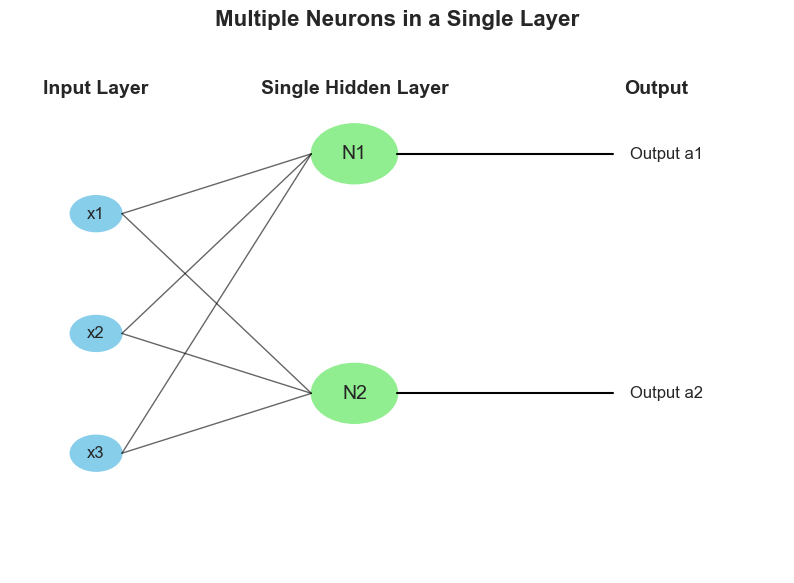

In [3]:
def draw_single_layer():
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.axis('off')
    
    # Inputs
    num_inputs = 3
    input_coords = []
    for i in range(num_inputs):
        x, y = 1, 4 - i * 2
        input_coords.append((x, y))
        ax.add_patch(plt.Circle((x, y), 0.3, color='skyblue'))
        ax.text(x, y, f'x{i+1}', ha='center', va='center', fontsize=12)

    # Neurons
    num_neurons = 2
    neuron_coords = []
    for i in range(num_neurons):
        x, y = 4, 5 - i * 4
        neuron_coords.append((x, y))
        ax.add_patch(plt.Circle((x, y), 0.5, color='lightgreen'))
        ax.text(x, y, f'N{i+1}', ha='center', va='center', fontsize=14)

    # Output
    output_coords = []
    for i in range(num_neurons):
        x, y = 7, 5 - i * 4
        output_coords.append((x, y))
        ax.plot([neuron_coords[i][0] + 0.5, x], [neuron_coords[i][1], y], 'k-', lw=1.5)
        ax.text(x + 0.2, y, f'Output a{i+1}', ha='left', va='center', fontsize=12)
        
    # Connections
    for ix, iy in input_coords:
        for nx, ny in neuron_coords:
            ax.plot([ix + 0.3, nx - 0.5], [iy, ny], 'k-', lw=1.0, alpha=0.6)

    ax.text(1, 6, "Input Layer", ha='center', fontsize=14, fontweight='bold')
    ax.text(4, 6, "Single Hidden Layer", ha='center', fontsize=14, fontweight='bold')
    ax.text(7.5, 6, "Output", ha='center', fontsize=14, fontweight='bold')
    ax.set_title("Multiple Neurons in a Single Layer", fontsize=16, fontweight='bold')
    ax.set_xlim(0, 9)
    ax.set_ylim(-2, 7)
    plt.show()

draw_single_layer()


### 🌐 Multi-Layer Neural Network (Deep Neural Network)

A multi-layer neural network, or deep neural network, consists of:
1.  **An Input Layer**: Receives the raw data.
2.  **One or more Hidden Layers**: These are intermediate layers where the network learns complex features. The output of one layer becomes the input to the next.
3.  **An Output Layer**: Produces the final prediction.

Each layer is typically fully connected to the next. The "deep" in "deep learning" refers to having multiple hidden layers.


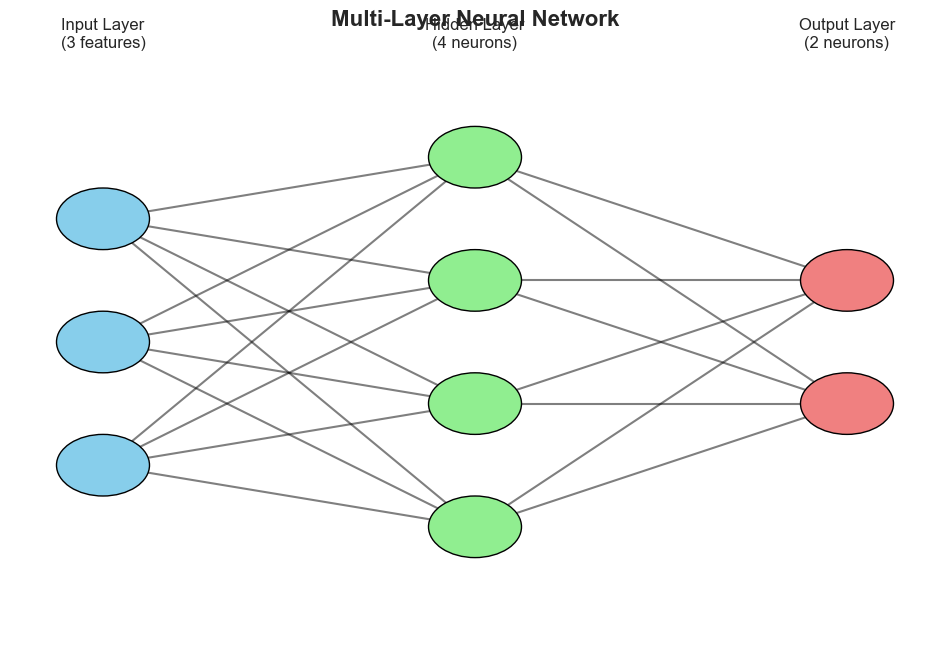

In [4]:
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon diagram.
    :param ax: matplotlib axes object
    :param left, right, bottom, top: canvas limits.
    :param layer_sizes: list of layer sizes, including input and output layers.
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            x = n*h_spacing + left
            y = layer_top - m*v_spacing
            circle = plt.Circle((x,y), v_spacing/4.,
                                color='skyblue' if n==0 else ('lightgreen' if n < n_layers-1 else 'lightcoral'), ec='k', zorder=4)
            ax.add_artist(circle)
            
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k', alpha=0.5)
                ax.add_artist(line)

fig = plt.figure(figsize=(12, 8))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [3, 4, 2])
ax.set_title("Multi-Layer Neural Network", fontsize=16, fontweight='bold')

# Labels
ax.text(0.1, 1.0, "Input Layer\n(3 features)", ha='center', va='center', fontsize=12)
ax.text(0.5, 1.0, "Hidden Layer\n(4 neurons)", ha='center', va='center', fontsize=12)
ax.text(0.9, 1.0, "Output Layer\n(2 neurons)", ha='center', va='center', fontsize=12)

plt.show()


## 3. Activation Functions

### 🎯 Why Do We Need Activation Functions?

Without activation functions, neural networks would just be linear models, no matter how many layers we stack!

**Activation functions introduce non-linearity**, allowing networks to learn complex patterns.

### Common Activation Functions:

1. **Sigmoid**: $\sigma(z) = \frac{1}{1 + e^{-z}}$
   - Output range: (0, 1)
   - Used in binary classification

2. **Tanh**: $\tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}$
   - Output range: (-1, 1)
   - Zero-centered (better than sigmoid)

3. **ReLU** (Rectified Linear Unit): $\text{ReLU}(z) = \max(0, z)$
   - Output range: [0, ∞)
   - Most popular in modern networks
   - Simple and efficient

4. **Softmax**: $\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j} e^{z_j}}$
   - Used in the output layer for multi-class classification
   - Outputs sum to 1 (probability distribution)


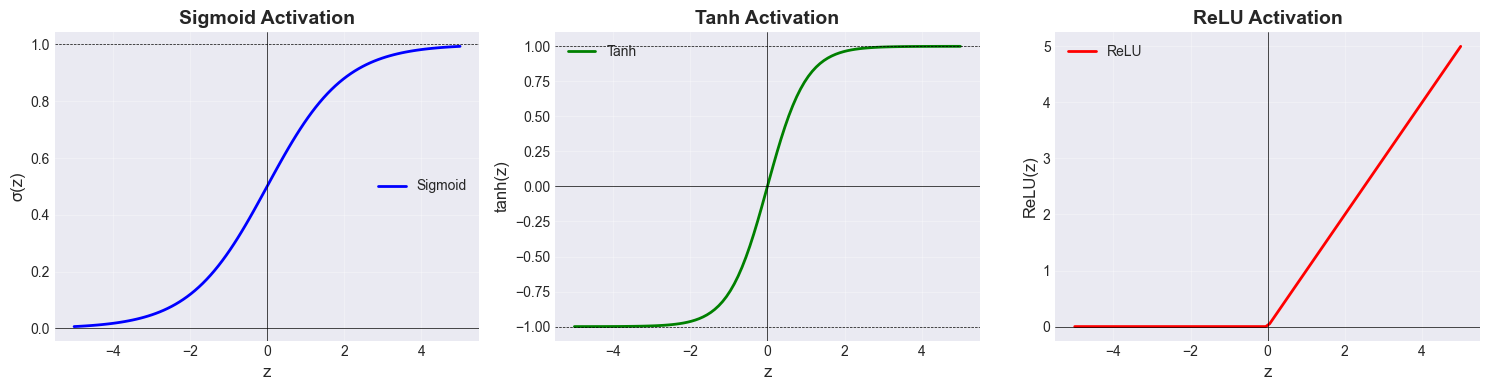

📊 Key Properties:
• Sigmoid: Smooth, bounded (0,1), but can cause vanishing gradients
• Tanh: Smooth, bounded (-1,1), zero-centered
• ReLU: Simple, unbounded, most popular in deep networks


In [5]:
# Implement activation functions
def sigmoid(z):
    """Sigmoid activation function"""
    return 1 / (1 + np.exp(-np.clip(z, -500, 500)))

def tanh(z):
    """Tanh activation function"""
    return np.tanh(z)

def relu(z):
    """ReLU activation function"""
    return np.maximum(0, z)

def softmax(z):
    """Softmax activation function"""
    exp_z = np.exp(z - np.max(z, axis=0, keepdims=True))  # Subtract max for numerical stability
    return exp_z / np.sum(exp_z, axis=0, keepdims=True)

# Visualize activation functions
z = np.linspace(-5, 5, 100)

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(z, sigmoid(z), 'b-', linewidth=2, label='Sigmoid')
plt.grid(True, alpha=0.3)
plt.xlabel('z', fontsize=12)
plt.ylabel('σ(z)', fontsize=12)
plt.title('Sigmoid Activation', fontsize=14, fontweight='bold')
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axhline(y=1, color='k', linewidth=0.5, linestyle='--')
plt.axvline(x=0, color='k', linewidth=0.5)
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(z, tanh(z), 'g-', linewidth=2, label='Tanh')
plt.grid(True, alpha=0.3)
plt.xlabel('z', fontsize=12)
plt.ylabel('tanh(z)', fontsize=12)
plt.title('Tanh Activation', fontsize=14, fontweight='bold')
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axhline(y=1, color='k', linewidth=0.5, linestyle='--')
plt.axhline(y=-1, color='k', linewidth=0.5, linestyle='--')
plt.axvline(x=0, color='k', linewidth=0.5)
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(z, relu(z), 'r-', linewidth=2, label='ReLU')
plt.grid(True, alpha=0.3)
plt.xlabel('z', fontsize=12)
plt.ylabel('ReLU(z)', fontsize=12)
plt.title('ReLU Activation', fontsize=14, fontweight='bold')
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)
plt.legend()

plt.tight_layout()
plt.show()

print("📊 Key Properties:")
print("• Sigmoid: Smooth, bounded (0,1), but can cause vanishing gradients")
print("• Tanh: Smooth, bounded (-1,1), zero-centered")
print("• ReLU: Simple, unbounded, most popular in deep networks")


## 4. Loss Functions: Measuring Error

### 📊 How Do We Know If Our Network Is Good?

A **loss function** (or cost function) measures how wrong our predictions are:
- Lower loss = Better predictions
- Goal: Minimize the loss

### Common Loss Functions:

1. **Mean Squared Error (MSE)** - for regression:
   $$L = \frac{1}{m} \sum_{i=1}^{m} (y^{(i)} - \hat{y}^{(i)})^2$$

2. **Binary Cross-Entropy** - for binary classification:
   $$L = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(\hat{y}^{(i)}) + (1-y^{(i)}) \log(1-\hat{y}^{(i)})]$$

3. **Categorical Cross-Entropy** - for multi-class classification:
   $$L = -\frac{1}{m} \sum_{i=1}^{m} \sum_{j=1}^{k} y_j^{(i)} \log(\hat{y}_j^{(i)})$$

Where:
- $m$ = number of training examples
- $y$ = true labels
- $\hat{y}$ = predicted values


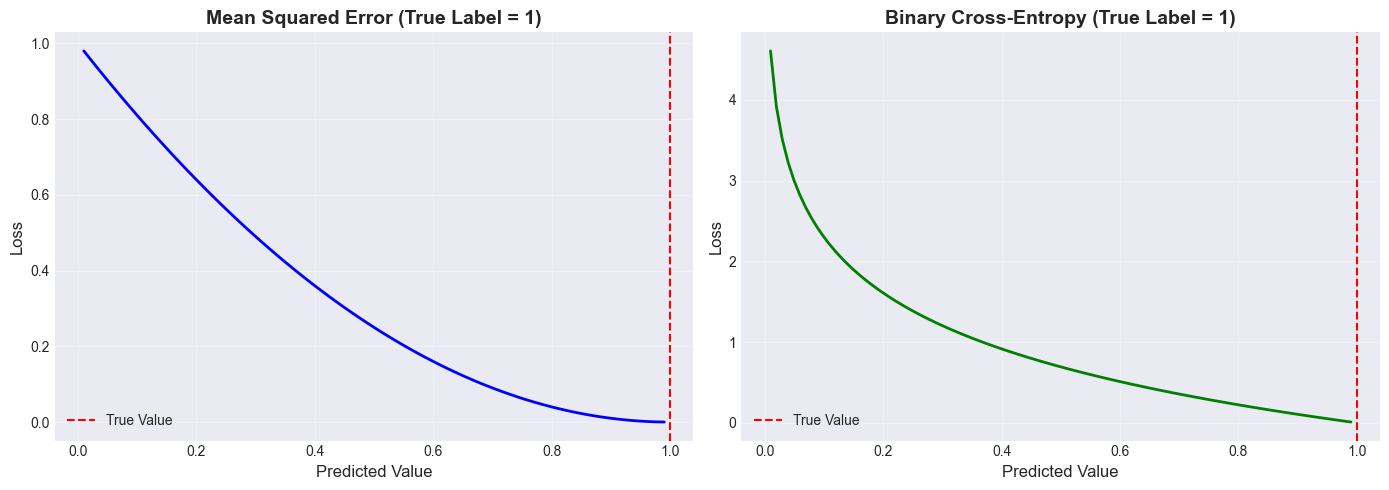

📊 Key Insights:
• Loss is minimized when prediction equals true label
• Cross-entropy penalizes confident wrong predictions more heavily
• MSE treats all errors quadratically


In [6]:
def mean_squared_error(y_true, y_pred):
    """Mean Squared Error loss"""
    return np.mean((y_true - y_pred) ** 2)

def binary_cross_entropy(y_true, y_pred, epsilon=1e-15):
    """
    Binary Cross-Entropy loss
    epsilon is added for numerical stability (avoid log(0))
    """
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def categorical_cross_entropy(y_true, y_pred, epsilon=1e-15):
    """Categorical Cross-Entropy loss"""
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(np.sum(y_true * np.log(y_pred), axis=0))

# Visualize how loss changes with predictions
y_true = 1.0  # True label
y_pred_range = np.linspace(0.01, 0.99, 100)

mse_losses = [(y_true - y_pred)**2 for y_pred in y_pred_range]
bce_losses = [binary_cross_entropy(np.array([y_true]), np.array([y_pred])) for y_pred in y_pred_range]

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(y_pred_range, mse_losses, 'b-', linewidth=2)
plt.xlabel('Predicted Value', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Mean Squared Error (True Label = 1)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.axvline(x=y_true, color='r', linestyle='--', label='True Value')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(y_pred_range, bce_losses, 'g-', linewidth=2)
plt.xlabel('Predicted Value', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Binary Cross-Entropy (True Label = 1)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.axvline(x=y_true, color='r', linestyle='--', label='True Value')
plt.legend()

plt.tight_layout()
plt.show()

print("📊 Key Insights:")
print("• Loss is minimized when prediction equals true label")
print("• Cross-entropy penalizes confident wrong predictions more heavily")
print("• MSE treats all errors quadratically")


## 5. Gradient Descent: The Learning Algorithm

### 🎯 How Do Neural Networks Learn?

**Gradient Descent** is an optimization algorithm that adjusts the weights to minimize the loss:

1. Start with random weights
2. Calculate the loss (how wrong are we?)
3. Calculate gradients (which direction should we move?)
4. Update weights in the opposite direction of gradients
5. Repeat until convergence

### Update Rule:

$$w = w - \alpha \frac{\partial L}{\partial w}$$

Where:
- $w$ = weight
- $\alpha$ = learning rate (how big are the steps?)
- $\frac{\partial L}{\partial w}$ = gradient (derivative of loss with respect to weight)

### 🔑 Key Concept: The Gradient

The gradient points in the direction of **steepest ascent**. We move in the **opposite direction** to minimize the loss!


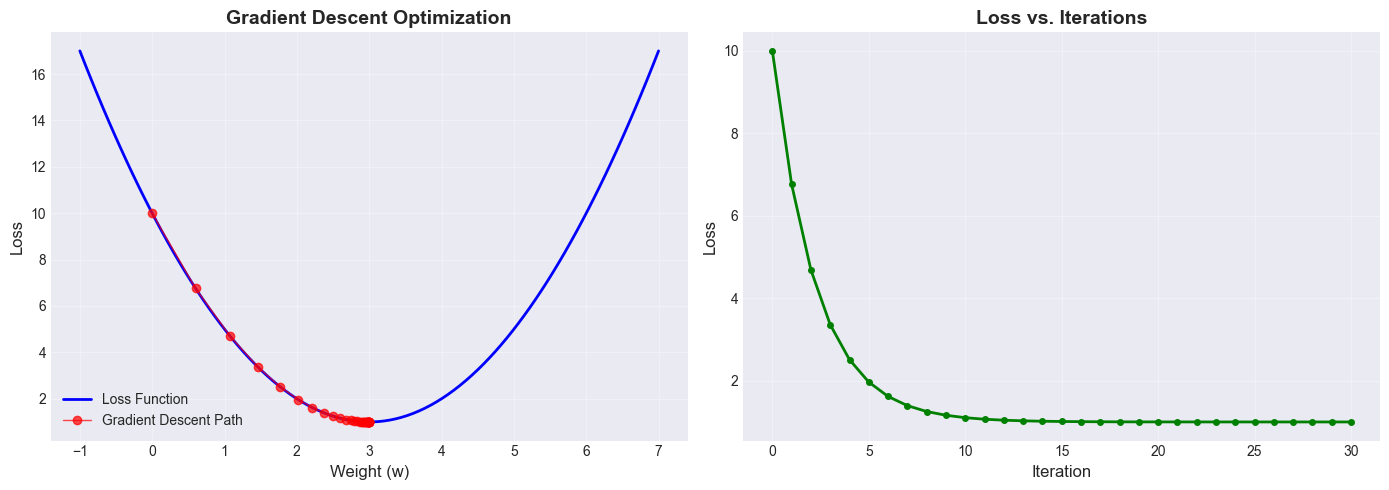

🎯 Optimization Results:
Starting weight: 0.0000
Final weight: 2.9963
Optimal weight: 3.0000

Starting loss: 10.0000
Final loss: 1.0000
Minimum loss: 1.0000


In [7]:
# Visualize gradient descent on a simple 1D function
def simple_function(w):
    """A simple quadratic function: f(w) = (w - 3)^2 + 1"""
    return (w - 3)**2 + 1

def gradient_simple(w):
    """Gradient of the simple function: f'(w) = 2(w - 3)"""
    return 2 * (w - 3)

# Gradient descent
w_init = 0.0
learning_rate = 0.1
n_iterations = 30

w_history = [w_init]
loss_history = [simple_function(w_init)]

w = w_init
for i in range(n_iterations):
    grad = gradient_simple(w)
    w = w - learning_rate * grad
    w_history.append(w)
    loss_history.append(simple_function(w))

# Plot the function and gradient descent path
w_range = np.linspace(-1, 7, 100)
f_range = simple_function(w_range)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(w_range, f_range, 'b-', linewidth=2, label='Loss Function')
plt.plot(w_history, [simple_function(w) for w in w_history], 
         'ro-', markersize=6, linewidth=1, alpha=0.7, label='Gradient Descent Path')
plt.xlabel('Weight (w)', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Gradient Descent Optimization', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(range(len(loss_history)), loss_history, 'g-', linewidth=2, marker='o', markersize=4)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Loss vs. Iterations', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"🎯 Optimization Results:")
print(f"Starting weight: {w_init:.4f}")
print(f"Final weight: {w:.4f}")
print(f"Optimal weight: 3.0000")
print(f"\nStarting loss: {loss_history[0]:.4f}")
print(f"Final loss: {loss_history[-1]:.4f}")
print(f"Minimum loss: 1.0000")


## 6. Backpropagation: Computing Gradients

### 🔄 The Chain Rule in Action

**Backpropagation** is the algorithm for computing gradients in neural networks using the **chain rule** from calculus.

### The Chain Rule:

If $y = f(g(x))$, then:
$$\frac{dy}{dx} = \frac{dy}{dg} \cdot \frac{dg}{dx}$$

### For Neural Networks:

To compute $\frac{\partial L}{\partial W^{[1]}}$ (gradient of loss with respect to first layer weights):

$$\frac{\partial L}{\partial W^{[1]}} = \frac{\partial L}{\partial A^{[2]}} \cdot \frac{\partial A^{[2]}}{\partial Z^{[2]}} \cdot \frac{\partial Z^{[2]}}{\partial A^{[1]}} \cdot \frac{\partial A^{[1]}}{\partial Z^{[1]}} \cdot \frac{\partial Z^{[1]}}{\partial W^{[1]}}$$

### The Process:

1. **Forward pass**: Compute predictions and loss
2. **Backward pass**: 
   - Start from the output layer
   - Compute gradients layer by layer
   - Move backwards through the network
3. **Update weights** using computed gradients


In [8]:
# Derivatives of activation functions
def sigmoid_derivative(z):
    """Derivative of sigmoid: σ'(z) = σ(z)(1 - σ(z))"""
    s = sigmoid(z)
    return s * (1 - s)

def relu_derivative(z):
    """Derivative of ReLU: 1 if z > 0, else 0"""
    return (z > 0).astype(float)

# Example: Simple 2-layer network
print("🔹 Backpropagation Concept")
print("\nIn a neural network:")
print("1. Forward pass computes predictions")
print("2. We calculate how wrong we are (loss)")
print("3. Backpropagation computes gradients:")
print("   - How much should we change each weight?")
print("   - In which direction?")
print("4. We update weights to improve predictions")
print("\n✅ The key insight: Chain rule allows us to compute")
print("   gradients efficiently, layer by layer!")


🔹 Backpropagation Concept

In a neural network:
1. Forward pass computes predictions
2. We calculate how wrong we are (loss)
3. Backpropagation computes gradients:
   - How much should we change each weight?
   - In which direction?
4. We update weights to improve predictions

✅ The key insight: Chain rule allows us to compute
   gradients efficiently, layer by layer!


## 7. Building a Complete Neural Network

Now let's put everything together into a complete neural network class that can learn from data!

This network will have:
- Multiple layers with customizable architecture
- Forward propagation
- Backward propagation  
- Gradient descent optimization
- Training and prediction methods


In [9]:
class NeuralNetwork:
    """
    A flexible multi-layer neural network for classification
    """
    
    def __init__(self, layer_dims, learning_rate=0.01):
        """
        Initialize the neural network
        
        Parameters:
        -----------
        layer_dims : list
            List containing dimensions of each layer [n_x, n_h1, n_h2, ..., n_y]
        learning_rate : float
            Learning rate for gradient descent
        """
        self.layer_dims = layer_dims
        self.learning_rate = learning_rate
        self.L = len(layer_dims) - 1  # Number of layers (excluding input)
        self.parameters = {}
        
        # Initialize parameters with He initialization
        for l in range(1, self.L + 1):
            self.parameters[f'W{l}'] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(2.0 / layer_dims[l-1])
            self.parameters[f'b{l}'] = np.zeros((layer_dims[l], 1))
        
        # Training history
        self.loss_history = []
        self.accuracy_history = []
        
    def forward(self, X):
        """Forward propagation through all layers"""
        self.cache = {'A0': X}
        A = X
        
        # Hidden layers with ReLU
        for l in range(1, self.L):
            Z = np.dot(self.parameters[f'W{l}'], A) + self.parameters[f'b{l}']
            A = relu(Z)
            self.cache[f'Z{l}'] = Z
            self.cache[f'A{l}'] = A
        
        # Output layer with softmax
        Z = np.dot(self.parameters[f'W{self.L}'], A) + self.parameters[f'b{self.L}']
        A = softmax(Z)
        self.cache[f'Z{self.L}'] = Z
        self.cache[f'A{self.L}'] = A
        
        return A
    
    def compute_loss(self, Y, Y_pred):
        """Compute categorical cross-entropy loss"""
        m = Y.shape[1]
        epsilon = 1e-15
        Y_pred = np.clip(Y_pred, epsilon, 1 - epsilon)
        loss = -(1/m) * np.sum(Y * np.log(Y_pred))
        return loss
    
    def backward(self, Y):
        """Backward propagation through all layers"""
        m = Y.shape[1]
        gradients = {}
        
        # Output layer
        dZ = self.cache[f'A{self.L}'] - Y
        gradients[f'dW{self.L}'] = (1/m) * np.dot(dZ, self.cache[f'A{self.L-1}'].T)
        gradients[f'db{self.L}'] = (1/m) * np.sum(dZ, axis=1, keepdims=True)
        
        # Hidden layers
        dA = np.dot(self.parameters[f'W{self.L}'].T, dZ)
        
        for l in reversed(range(1, self.L)):
            dZ = dA * relu_derivative(self.cache[f'Z{l}'])
            gradients[f'dW{l}'] = (1/m) * np.dot(dZ, self.cache[f'A{l-1}'].T)
            gradients[f'db{l}'] = (1/m) * np.sum(dZ, axis=1, keepdims=True)
            
            if l > 1:
                dA = np.dot(self.parameters[f'W{l}'].T, dZ)
        
        # Update parameters
        for l in range(1, self.L + 1):
            self.parameters[f'W{l}'] -= self.learning_rate * gradients[f'dW{l}']
            self.parameters[f'b{l}'] -= self.learning_rate * gradients[f'db{l}']
    
    def train(self, X, Y, epochs, batch_size=128, X_val=None, Y_val=None, verbose=True):
        """Train the neural network using mini-batch gradient descent"""
        m = X.shape[1]
        
        for epoch in range(epochs):
            # Shuffle data
            permutation = np.random.permutation(m)
            X_shuffled = X[:, permutation]
            Y_shuffled = Y[:, permutation]
            
            # Mini-batch training
            epoch_loss = 0
            num_batches = max(1, m // batch_size)
            
            for i in range(num_batches):
                start = i * batch_size
                end = min(start + batch_size, m)
                X_batch = X_shuffled[:, start:end]
                Y_batch = Y_shuffled[:, start:end]
                
                # Forward and backward pass
                Y_pred = self.forward(X_batch)
                loss = self.compute_loss(Y_batch, Y_pred)
                self.backward(Y_batch)
                
                epoch_loss += loss
            
            avg_loss = epoch_loss / num_batches
            self.loss_history.append(avg_loss)
            
            # Compute accuracy on validation set if provided
            if X_val is not None and Y_val is not None:
                acc = self.accuracy(X_val, Y_val)
                self.accuracy_history.append(acc)
            
            # Print progress
            if verbose and (epoch % 5 == 0 or epoch == epochs - 1):
                if X_val is not None:
                    print(f"Epoch {epoch:3d}/{epochs} - Loss: {avg_loss:.4f} - Val Accuracy: {acc:.4f}")
                else:
                    print(f"Epoch {epoch:3d}/{epochs} - Loss: {avg_loss:.4f}")
    
    def predict(self, X):
        """Make predictions (return class labels)"""
        Y_pred = self.forward(X)
        return np.argmax(Y_pred, axis=0)
    
    def accuracy(self, X, Y):
        """Compute accuracy"""
        predictions = self.predict(X)
        labels = np.argmax(Y, axis=0)
        return np.mean(predictions == labels)

print("✅ NeuralNetwork class created successfully!")


✅ NeuralNetwork class created successfully!


## 8. MNIST: Handwritten Digit Recognition

### 🎯 The Challenge

Now let's apply everything we've learned to a real-world problem: **recognizing handwritten digits**!

**MNIST Dataset:**
- 70,000 images of handwritten digits (0-9)
- 28×28 pixels = 784 features per image
- 60,000 training images
- 10,000 test images

### Our Approach:
1. Load and explore the dataset
2. Preprocess the data
3. Build a multi-layer neural network
4. Train on the MNIST dataset
5. Evaluate performance
6. Visualize predictions


### 8.1 Load and Explore MNIST Dataset


In [11]:
import gzip
import numpy as np
import urllib.request
import ssl

def load_mnist_from_url(urls):
    """
    Load MNIST data by downloading it from a list of URLs.
    
    Parameters:
    -----------
    urls : list of str
        A list containing the four URLs for the MNIST dataset files.
        
    Returns:
    --------
    tuple: (X_train, y_train), (X_test, y_test)
    """
    # Create a default SSL context to avoid potential SSL certificate verification issues.
    # This can be necessary in some environments.
    ssl._create_default_https_context = ssl._create_unverified_context
    
    data = {}
    
    # Process each URL
    for url in urls:
        filename = url.split('/')[-1]
        print(f"Downloading and parsing {filename}...")
        
        with urllib.request.urlopen(url) as response:
            compressed_file = response.read()
            decompressed_file = gzip.decompress(compressed_file)
            
            if 'labels' in filename:
                # Parse labels
                parsed_data = np.frombuffer(decompressed_file, dtype=np.uint8, offset=8)
                if 'train' in filename:
                    data['y_train'] = parsed_data
                else: # 't10k'
                    data['y_test'] = parsed_data
            elif 'images' in filename:
                # Parse images
                parsed_data = np.frombuffer(decompressed_file, dtype=np.uint8, offset=16)
                if 'train' in filename:
                    data['X_train'] = parsed_data
                else: # 't10k'
                    data['X_test'] = parsed_data

    # Reshape the image arrays to their 2D structure (28x28)
    # This step is crucial and depends on the corresponding label files being processed first
    # to know the number of items.
    if 'y_train' in data and 'X_train' in data:
        data['X_train'] = data['X_train'].reshape(len(data['y_train']), 28, 28)
    
    if 'y_test' in data and 'X_test' in data:
        data['X_test'] = data['X_test'].reshape(len(data['y_test']), 28, 28)

    return (data['X_train'], data['y_train']), (data['X_test'], data['y_test'])

# --- Main loading logic ---

# URLs for the MNIST dataset files
mnist_address = [
    "https://github.com/entropicemergence/tiny_llm_server/releases/download/v0.1.0/t10k-images-idx3-ubyte.gz",
    "https://github.com/entropicemergence/tiny_llm_server/releases/download/v0.1.0/t10k-labels-idx1-ubyte.gz",
    "https://github.com/entropicemergence/tiny_llm_server/releases/download/v0.1.0/train-images-idx3-ubyte.gz",
    "https://github.com/entropicemergence/tiny_llm_server/releases/download/v0.1.0/train-labels-idx1-ubyte.gz"
]

# Load MNIST dataset from URLs
try:
    (X_train, y_train), (X_test, y_test) = load_mnist_from_url(mnist_address)

    print("\n📊 MNIST Dataset Loaded from URL!")
    print(f"\nTraining set: {X_train.shape[0]} images")
    print(f"Test set: {X_test.shape[0]} images")
    print(f"Image shape: {X_train.shape[1]} × {X_train.shape[2]} pixels")
    print(f"Pixel value range: [{X_train.min()}, {X_train.max()}]")

except Exception as e:
    print(f"🔥 An error occurred while downloading or processing the files: {e}")
    print("Please check your internet connection and the validity of the URLs.")


📊 MNIST Dataset Loaded from URL!

Training set: 60000 images
Test set: 10000 images
Image shape: 28 × 28 pixels
Pixel value range: [0, 255]


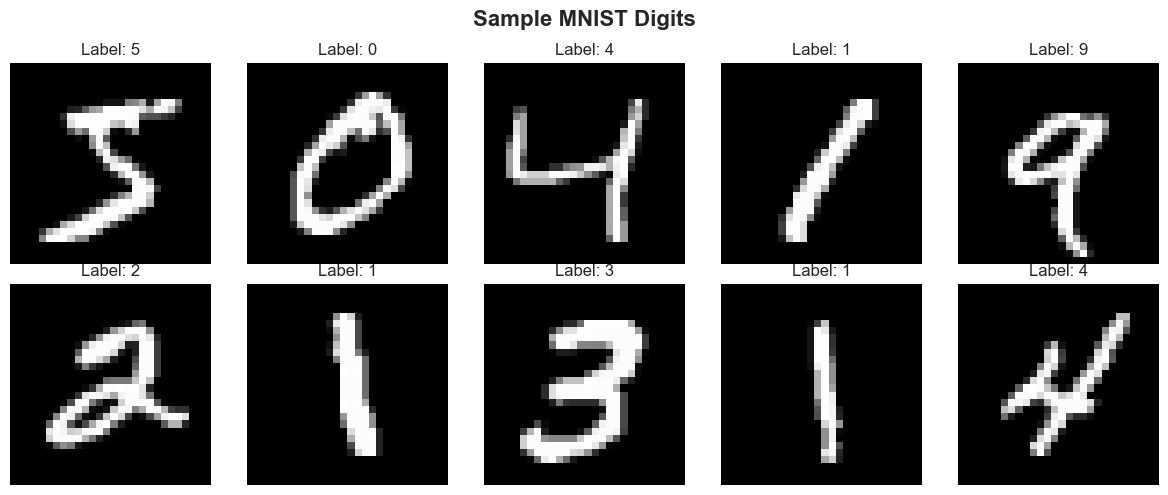

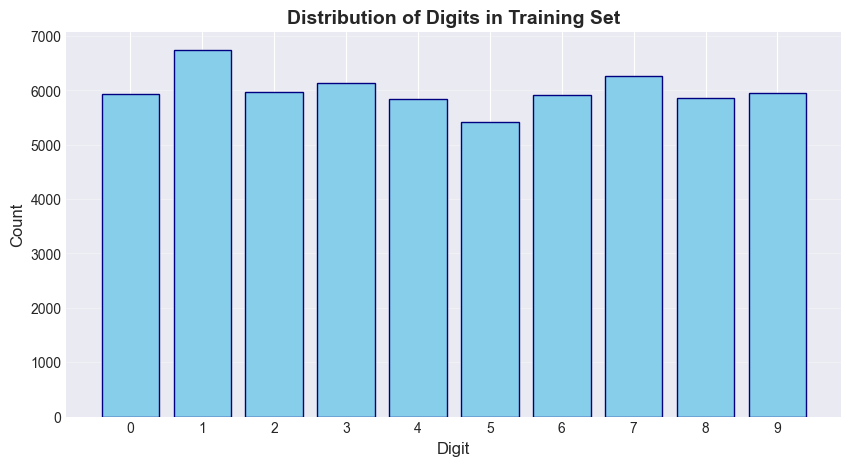


📊 Label Distribution:
Digit 0:  5923 samples (9.87%)
Digit 1:  6742 samples (11.24%)
Digit 2:  5958 samples (9.93%)
Digit 3:  6131 samples (10.22%)
Digit 4:  5842 samples (9.74%)
Digit 5:  5421 samples (9.04%)
Digit 6:  5918 samples (9.86%)
Digit 7:  6265 samples (10.44%)
Digit 8:  5851 samples (9.75%)
Digit 9:  5949 samples (9.92%)


In [12]:
# Visualize some examples
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
fig.suptitle('Sample MNIST Digits', fontsize=16, fontweight='bold')

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(f'Label: {y_train[i]}', fontsize=12)
    ax.axis('off')

plt.tight_layout()
plt.show()

# Show label distribution
unique, counts = np.unique(y_train, return_counts=True)
plt.figure(figsize=(10, 5))
plt.bar(unique, counts, color='skyblue', edgecolor='navy')
plt.xlabel('Digit', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Digits in Training Set', fontsize=14, fontweight='bold')
plt.xticks(unique)
plt.grid(axis='y', alpha=0.3)
plt.show()

print("\n📊 Label Distribution:")
for digit, count in zip(unique, counts):
    print(f"Digit {digit}: {count:5d} samples ({count/len(y_train)*100:.2f}%)")


### 8.2 Preprocess the Data


In [13]:
def preprocess_mnist(X_train, y_train, X_test, y_test):
    """
    Preprocess MNIST data for neural network training
    
    Steps:
    1. Flatten images from 28×28 to 784-dimensional vectors
    2. Normalize pixel values to [0, 1]
    3. One-hot encode labels
    4. Transpose to match our network format (features, samples)
    """
    # Flatten images
    X_train_flat = X_train.reshape(X_train.shape[0], -1).T  # (784, 60000)
    X_test_flat = X_test.reshape(X_test.shape[0], -1).T      # (784, 10000)
    
    # Normalize to [0, 1]
    X_train_norm = X_train_flat / 255.0
    X_test_norm = X_test_flat / 255.0
    
    # One-hot encode labels
    def one_hot_encode(y, num_classes=10):
        m = y.shape[0]
        y_encoded = np.zeros((num_classes, m))
        for i in range(m):
            y_encoded[y[i], i] = 1
        return y_encoded
    
    y_train_encoded = one_hot_encode(y_train)
    y_test_encoded = one_hot_encode(y_test)
    
    return X_train_norm, y_train_encoded, X_test_norm, y_test_encoded

X_train_proc, y_train_proc, X_test_proc, y_test_proc = preprocess_mnist(X_train, y_train, X_test, y_test)

print("✅ Data Preprocessing Complete!")
print(f"\nTraining data shape: {X_train_proc.shape}")
print(f"Training labels shape: {y_train_proc.shape}")
print(f"Test data shape: {X_test_proc.shape}")
print(f"Test labels shape: {y_test_proc.shape}")
print(f"\nPixel value range after normalization: [{X_train_proc.min():.2f}, {X_train_proc.max():.2f}]")

# Example of one-hot encoding
print("\n📊 One-Hot Encoding Example:")
print(f"Original label: {y_train[0]}")
print(f"One-hot encoded: {y_train_proc[:, 0]}")


✅ Data Preprocessing Complete!

Training data shape: (784, 60000)
Training labels shape: (10, 60000)
Test data shape: (784, 10000)
Test labels shape: (10, 10000)

Pixel value range after normalization: [0.00, 1.00]

📊 One-Hot Encoding Example:
Original label: 5
One-hot encoded: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### 8.3 Train the Network on MNIST

Now let's train our neural network! We'll use a subset of the data for faster training (you can increase this later).

**Network Architecture:**
- Input Layer: 784 neurons (28×28 pixels)
- Hidden Layer 1: 128 neurons (ReLU activation)
- Hidden Layer 2: 64 neurons (ReLU activation)
- Output Layer: 10 neurons (Softmax activation)


In [14]:
# Use a subset of data for faster training (you can increase this)
n_train = 10000
n_test = 2000

X_train_subset = X_train_proc[:, :n_train]
y_train_subset = y_train_proc[:, :n_train]
X_test_subset = X_test_proc[:, :n_test]
y_test_subset = y_test_proc[:, :n_test]

print(f"📊 Training with {n_train} samples, testing with {n_test} samples")
print("\n" + "="*60)
print("🚀 Training Neural Network on MNIST...")
print("="*60 + "\n")

# Create network
layer_dims = [784, 128, 64, 10]
mnist_nn = NeuralNetwork(layer_dims, learning_rate=0.1)

# Train network
mnist_nn.train(X_train_subset, y_train_subset, 
               epochs=50, 
               batch_size=128,
               X_val=X_test_subset,
               Y_val=y_test_subset,
               verbose=True)

print("\n" + "="*60)
print("✅ Training Complete!")
print("="*60)


📊 Training with 10000 samples, testing with 2000 samples

🚀 Training Neural Network on MNIST...

Epoch   0/50 - Loss: 0.9293 - Val Accuracy: 0.8350
Epoch   5/50 - Loss: 0.1990 - Val Accuracy: 0.9060
Epoch  10/50 - Loss: 0.1269 - Val Accuracy: 0.9205
Epoch  15/50 - Loss: 0.0871 - Val Accuracy: 0.9285
Epoch  20/50 - Loss: 0.0580 - Val Accuracy: 0.9275
Epoch  25/50 - Loss: 0.0398 - Val Accuracy: 0.9355
Epoch  30/50 - Loss: 0.0275 - Val Accuracy: 0.9320
Epoch  35/50 - Loss: 0.0190 - Val Accuracy: 0.9365
Epoch  40/50 - Loss: 0.0134 - Val Accuracy: 0.9350
Epoch  45/50 - Loss: 0.0098 - Val Accuracy: 0.9350
Epoch  49/50 - Loss: 0.0080 - Val Accuracy: 0.9345

✅ Training Complete!


### 8.4 Evaluate Performance


📊 Final Results:
Training Accuracy:   99.99%
Test Accuracy:       93.45%


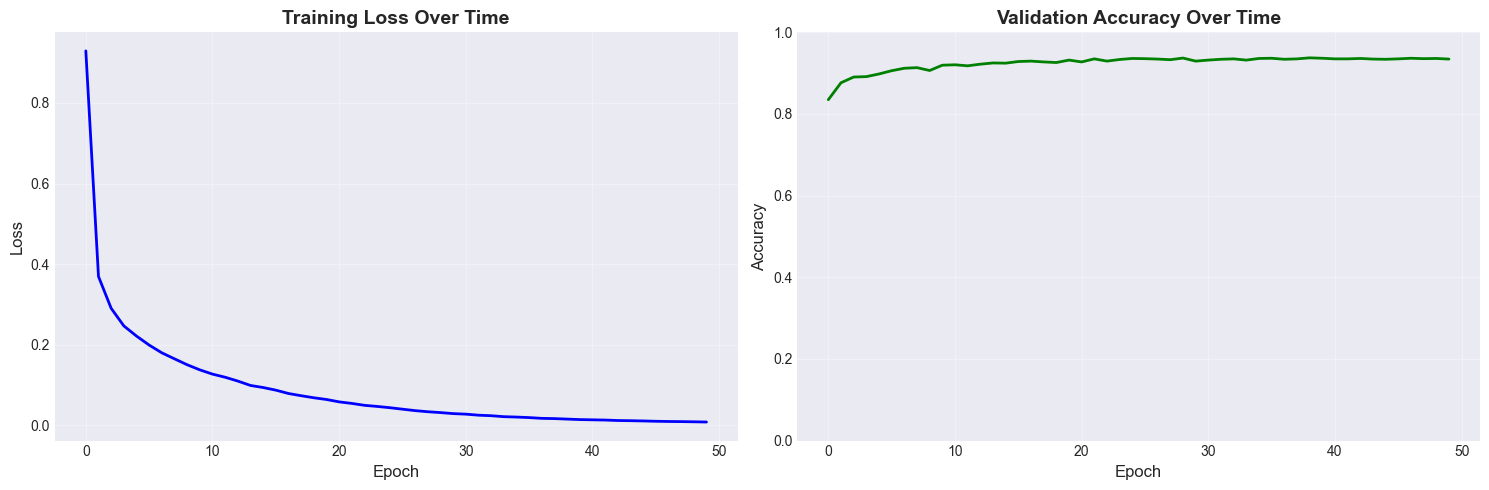

In [15]:
# Compute final accuracy
train_acc = mnist_nn.accuracy(X_train_subset, y_train_subset)
test_acc = mnist_nn.accuracy(X_test_subset, y_test_subset)

print("📊 Final Results:")
print("="*40)
print(f"Training Accuracy:   {train_acc*100:.2f}%")
print(f"Test Accuracy:       {test_acc*100:.2f}%")
print("="*40)

# Plot training history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Loss curve
ax1.plot(mnist_nn.loss_history, linewidth=2, color='blue')
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Loss', fontsize=12)
ax1.set_title('Training Loss Over Time', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Accuracy curve
ax2.plot(mnist_nn.accuracy_history, linewidth=2, color='green')
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Accuracy', fontsize=12)
ax2.set_title('Validation Accuracy Over Time', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_ylim([0, 1])

plt.tight_layout()
plt.show()


### 8.5 Visualize Predictions


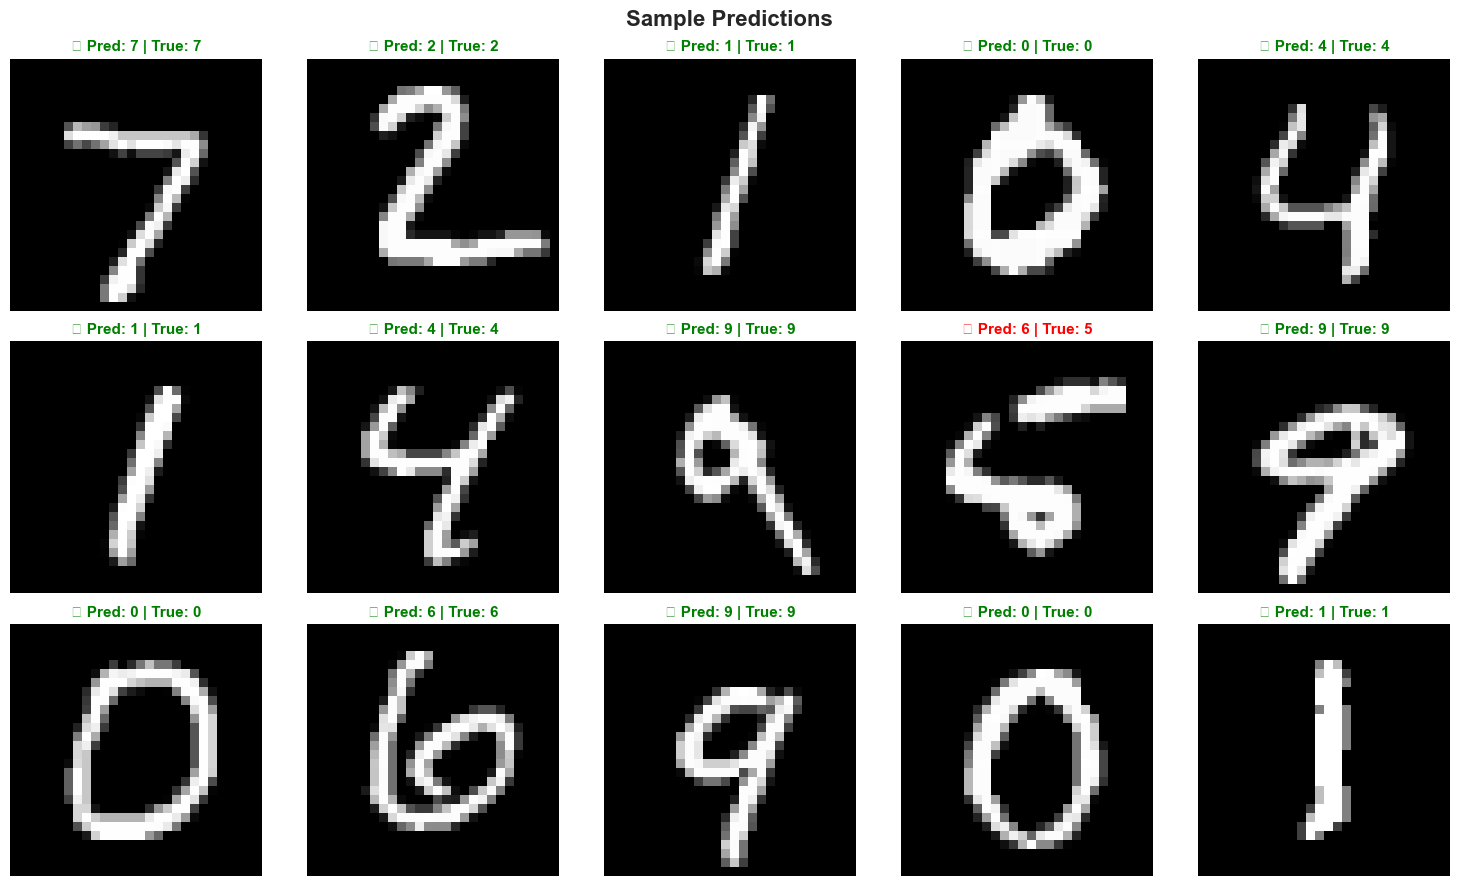

In [16]:
# Make predictions on test set
predictions = mnist_nn.predict(X_test_subset)
true_labels = np.argmax(y_test_subset, axis=0)

# Visualize some predictions
fig, axes = plt.subplots(3, 5, figsize=(15, 9))
fig.suptitle('Sample Predictions', fontsize=16, fontweight='bold')

for i, ax in enumerate(axes.flat):
    # Get original image
    img = X_test_subset[:, i].reshape(28, 28)
    
    # Display image
    ax.imshow(img, cmap='gray')
    
    # Title with prediction and true label
    pred = predictions[i]
    true = true_labels[i]
    
    if pred == true:
        color = 'green'
        symbol = '✓'
    else:
        color = 'red'
        symbol = '✗'
    
    ax.set_title(f'{symbol} Pred: {pred} | True: {true}', 
                 fontsize=11, color=color, fontweight='bold')
    ax.axis('off')

plt.tight_layout()
plt.show()


### 8.6 Confusion Matrix


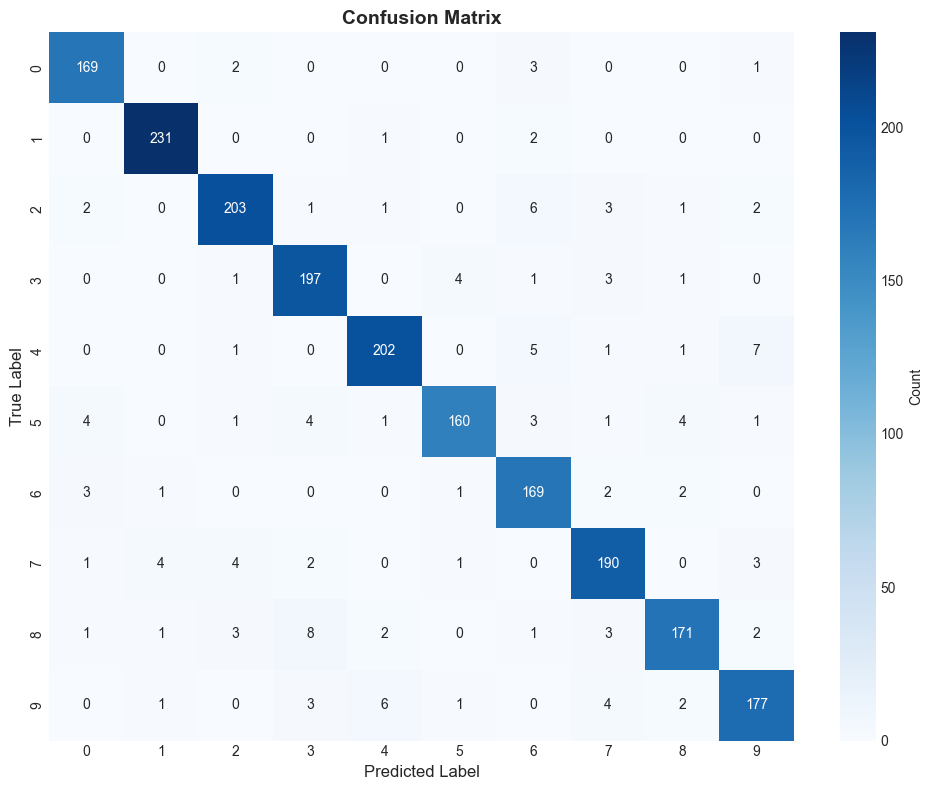


📊 Per-Class Accuracy:
Digit 0: 96.57% (169/175)
Digit 1: 98.72% (231/234)
Digit 2: 92.69% (203/219)
Digit 3: 95.17% (197/207)
Digit 4: 93.09% (202/217)
Digit 5: 89.39% (160/179)
Digit 6: 94.94% (169/178)
Digit 7: 92.68% (190/205)
Digit 8: 89.06% (171/192)
Digit 9: 91.24% (177/194)


In [17]:
# Compute confusion matrix
def compute_confusion_matrix(y_true, y_pred, num_classes=10):
    cm = np.zeros((num_classes, num_classes), dtype=int)
    for true, pred in zip(y_true, y_pred):
        cm[true, pred] += 1
    return cm

cm = compute_confusion_matrix(true_labels, predictions)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10),
            cbar_kws={'label': 'Count'})
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Compute per-class accuracy
print("\n📊 Per-Class Accuracy:")
print("="*40)
for digit in range(10):
    correct = cm[digit, digit]
    total = np.sum(cm[digit, :])
    acc = correct / total if total > 0 else 0
    print(f"Digit {digit}: {acc*100:5.2f}% ({correct}/{total})")
print("="*40)


## 9. Summary and Key Takeaways

### 🎓 What We've Learned

Congratulations! You've completed a comprehensive journey through neural networks. Here's what we covered:

1. **Neural Network Fundamentals**
   - Neurons compute weighted sums and apply activation functions
   - Activation functions introduce non-linearity (ReLU, Sigmoid, Softmax)
   - Networks consist of input, hidden, and output layers

2. **Forward Propagation**
   - Information flows from input to output
   - Each layer transforms the data: $A^{[l]} = f(W^{[l]} A^{[l-1]} + b^{[l]})$

3. **Loss Functions**
   - Measure how wrong our predictions are
   - Different tasks need different loss functions
   - Cross-entropy for classification, MSE for regression

4. **Gradient Descent**
   - Optimization algorithm to minimize loss
   - Update rule: $w = w - \alpha \frac{\partial L}{\partial w}$
   - Learning rate controls step size

5. **Backpropagation**
   - Efficient algorithm to compute gradients
   - Uses chain rule to propagate errors backward
   - Essential for training deep networks

6. **MNIST Classification**
   - Built a network from scratch
   - Achieved good accuracy on real-world data
   - Learned to recognize handwritten digits!

### 🚀 How Modern Neural Networks Learn

**The complete learning cycle:**
1. **Forward Pass**: Make predictions
2. **Loss Calculation**: Measure errors
3. **Backpropagation**: Compute gradients (how to improve)
4. **Gradient Descent**: Update parameters
5. **Repeat** until convergence!


### 📈 Next Steps to Deepen Your Understanding

1. **Experiment with Hyperparameters**
   - Try different learning rates (0.001, 0.01, 0.1, 1.0)
   - Change network architecture (more/fewer layers, neurons)
   - Use different activation functions
   - Adjust batch size and number of epochs

2. **Advanced Techniques to Explore**
   - **Regularization**: L2 regularization, Dropout to prevent overfitting
   - **Batch Normalization**: Normalize activations between layers
   - **Better Optimizers**: Adam, RMSprop (adaptive learning rates)
   - **Learning Rate Scheduling**: Decrease learning rate over time
   - **Data Augmentation**: Create more training data through transformations

3. **Explore Different Architectures**
   - **Convolutional Neural Networks (CNNs)**: For image data
   - **Recurrent Neural Networks (RNNs)**: For sequential data
   - **Transformers**: For modern NLP and beyond

4. **Use Modern Frameworks**
   - **TensorFlow/Keras**: High-level API, easy to use
   - **PyTorch**: More flexible, popular in research
   - **JAX**: High-performance, functional approach

### 📚 Recommended Resources

- **Videos**: 
  - 3Blue1Brown Neural Network Series (Visual intuition)
  - Stanford CS231n (Convolutional Networks)
  
- **Books**: 
  - *Deep Learning* by Goodfellow, Bengio, and Courville
  - *Neural Networks and Deep Learning* by Michael Nielsen (free online)
  
- **Courses**:
  - Fast.ai: Practical Deep Learning
  - Andrew Ng's Deep Learning Specialization
  - Stanford CS231n and CS224n


## 10. Exercises: Practice Your Skills!

### 🎯 Challenge Tasks

Try these exercises to reinforce your learning:

#### Exercise 1: Modify Network Architecture
- Add another hidden layer (e.g., [784, 128, 128, 64, 10])
- Try different numbers of neurons per layer
- Compare the performance and training time
- **Question**: Does more layers always mean better performance?

#### Exercise 2: Experiment with Learning Rates
- Train the network with learning rates: [0.001, 0.01, 0.1, 1.0]
- Plot the loss curves for each
- **Question**: What happens if the learning rate is too high? Too low?

#### Exercise 3: Train on Full MNIST Dataset
- Use all 60,000 training images instead of 10,000
- Train for more epochs
- **Challenge**: Can you reach >95% test accuracy?

#### Exercise 4: Analyze Misclassifications
- Find examples where the network makes mistakes
- Visualize the top 10 most confident wrong predictions
- **Question**: What patterns do you notice in the errors?

#### Exercise 5: Implement Additional Features
- Add L2 regularization to prevent overfitting
- Implement early stopping (stop training when validation loss stops improving)
- Try different weight initialization schemes (Xavier, He)
- **Advanced**: Implement dropout regularization

#### Exercise 6: Visualize Learned Features
- Extract and visualize the weights from the first hidden layer
- Plot them as 28×28 images
- **Question**: What patterns has the network learned to detect?

#### Exercise 7: Try Different Datasets
- Apply your network to Fashion-MNIST (clothing items)
- Modify the architecture if needed
- **Question**: Is the same architecture optimal for different datasets?


In [ ]:
# 💡 Space for Your Experiments!
# Try the challenge exercises above here

# Example: Experiment with different learning rates
# Uncomment and run:

# learning_rates = [0.001, 0.01, 0.1, 1.0]
# histories = {}
# 
# for lr in learning_rates:
#     print(f"\nTraining with learning rate: {lr}")
#     nn = NeuralNetwork([784, 128, 64, 10], learning_rate=lr)
#     nn.train(X_train_subset, y_train_subset, epochs=30, 
#              X_val=X_test_subset, Y_val=y_test_subset, verbose=False)
#     histories[lr] = nn.loss_history
# 
# # Plot comparison
# plt.figure(figsize=(10, 6))
# for lr, loss_history in histories.items():
#     plt.plot(loss_history, label=f'LR={lr}', linewidth=2)
# plt.xlabel('Epoch', fontsize=12)
# plt.ylabel('Loss', fontsize=12)
# plt.title('Effect of Learning Rate on Training', fontsize=14, fontweight='bold')
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.show()

print("✨ Ready for your experiments!")
print("Uncomment the code above or write your own experiments below:")


## 11. Final Thoughts

### 🎉 Congratulations!

You've successfully:
- ✅ Understood how neurons and neural networks work
- ✅ Learned about activation functions and their importance
- ✅ Mastered forward and backward propagation
- ✅ Understood gradient descent optimization
- ✅ Built a complete neural network from scratch
- ✅ Trained a network to recognize handwritten digits
- ✅ Achieved good accuracy on real-world data

### 💡 Key Insight

**Neural networks learn by repeatedly:**
1. Making predictions (forward propagation)
2. Measuring how wrong they are (loss function)
3. Computing how to improve (backpropagation)
4. Adjusting their parameters (gradient descent)

This simple yet powerful cycle enables neural networks to learn incredibly complex patterns from data!

### 🚀 Your Journey Continues

You now have the foundation to:
- Build and train your own neural networks
- Understand modern deep learning papers and architectures
- Experiment with different techniques and optimizations
- Solve real-world problems with AI

Keep learning, keep experimenting, and most importantly, **keep building**! 